# <span style="color:red"> Business Goal: Improving Customer Experience</span>
# Q : How to prevent aircraft delay?
# <span style="color:blue"> Models : Predicting aircraft delay.</span>
Team member: Doan Kieu, Clivia Kong, Nina Huang

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Airlines.csv")

In [3]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


# Exploratory Data Analysis (EDA)

In [4]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [5]:
df.Airline.unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [6]:
df.AirportFrom.nunique()

293

In [7]:
df.AirportTo.nunique()

293

In [8]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [9]:
df.corr()

,id,Flight,DayOfWeek,Time,Length,Delay
id,1.000000,-0.006156,-0.055474,0.029156,0.020781,0.139762
Flight,-0.006156,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,-0.055474,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,0.029156,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,0.020781,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,0.139762,-0.046175,-0.026199,0.150454,0.040489,1.000000


## <h1 style="color:green"> DAY OF THE WEEK</h1>

<AxesSubplot:xlabel='DayOfWeek'>

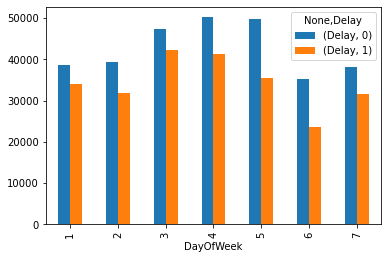

In [10]:
df.groupby(by = ["DayOfWeek","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

 <span style="color:blue"> Friday and saturday has less delay than the rest of the week. but the difference is not significant.</span> <span style="color:red">(Can probably perform a hypothesis test here) </span> 

## <h1 style="color:green"> AIRLINE</h1>

<AxesSubplot:xlabel='Airline'>

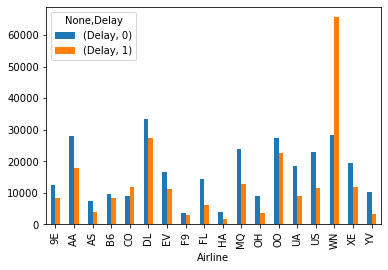

In [11]:
df.groupby(by = ["Airline","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

### F9, CO, WN, DL, B6, OO have high delay rate

In [12]:
df_by_airline_delayrate = df.groupby(by = ["Airline", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airline_delayrate["delay_rate"]= np.divide(df_by_airline_delayrate.iloc[:,1],
                                                     df_by_airline_delayrate.iloc[:,0])
df_by_airline_delayrate.delay_rate.describe()

count    18.000000
mean      0.731688
std       0.456504
min       0.320855
25%       0.485805
50%       0.622702
75%       0.818570
max       2.308615
Name: delay_rate, dtype: float64

## <h1 style="color:green"> AIRPORT</h1>

In [13]:
df_by_airportfrom_delayrate = df.groupby(by = ["AirportFrom", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airportfrom_delayrate["delay_rate"]= np.divide(df_by_airportfrom_delayrate.iloc[:,1],
                                                     df_by_airportfrom_delayrate.iloc[:,0])

In [14]:
df_by_airportto_delayrate = df.groupby(by = ["AirportTo", "Delay"]).agg({"Delay":"count"}).unstack()
df_by_airportto_delayrate["delay_rate"]= np.divide(df_by_airportto_delayrate.iloc[:,1],
                                                     df_by_airportto_delayrate.iloc[:,0])

/Users/linhvien/opt/anaconda3/envs/iod/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delay_rate'>

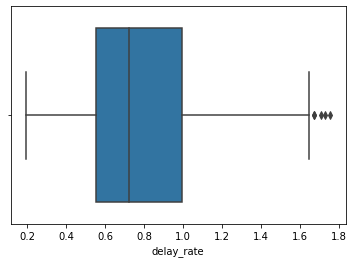

In [15]:
sns.boxplot(df_by_airportto_delayrate.delay_rate)

In [16]:
df_by_airportto_delayrate.delay_rate.describe()

count    292.000000
mean       0.783180
std        0.318774
min        0.192308
25%        0.551974
50%        0.720338
75%        0.992003
max        1.755831
Name: delay_rate, dtype: float64

In [17]:
df_by_airportfrom_delayrate.delay_rate.describe()

count    293.000000
mean       0.648578
std        0.352572
min        0.132353
25%        0.421053
50%        0.583463
75%        0.775391
max        2.776183
Name: delay_rate, dtype: float64

## <h1 style="color:green"> FEATURE ENGINEERING ON AIRLINE & AIRPORT</h1>

## Airline, Airport from and Airport to are categorical features, but they have too many categories. We will divide each of the feature into 2 categories: below & above the delay rate mean 

In [18]:
#calculate the delay rate mean for each Airline:
airline_delay_rate_mean = df_by_airline_delayrate.delay_rate.mean()

#Generate a list of airline that delay more than average:
list_more_delay_airline = df_by_airline_delayrate[df_by_airline_delayrate.delay_rate>
                                                  airline_delay_rate_mean].index.values.tolist()

df["more_delay_airline"] = df["Airline"].apply(lambda x : 1 if x in list_more_delay_airline
                                               else 0)

In [19]:
#calculate the delay rate mean for each AirportFrom:
airportfrom_delay_rate_mean = df_by_airportfrom_delayrate.delay_rate.mean()

#Generate a list of airportfrom that delay more than average:
list_more_delay_airportfrom = df_by_airportfrom_delayrate[df_by_airportfrom_delayrate.delay_rate>
                                                  airportfrom_delay_rate_mean].index.values.tolist()

df["more_delay_airportfrom"] = df["AirportFrom"].apply(lambda x : 1 if x in list_more_delay_airportfrom
                                               else 0)

In [20]:
#calculate the delay rate mean for each AirportTo:
airportto_delay_rate_mean = df_by_airportto_delayrate.delay_rate.mean()

#Generate a list of airportto that delay more than average:
list_more_delay_airportto = df_by_airportto_delayrate[df_by_airportto_delayrate.delay_rate>
                                                  airportto_delay_rate_mean].index.values.tolist()

df["more_delay_airportto"] = df["AirportTo"].apply(lambda x : 1 if x in list_more_delay_airportto
                                               else 0)

In [21]:
airportto_most_delay_rate_75 = df_by_airportto_delayrate.delay_rate.quantile(q=0.75)
list_most_delay_airportto = df_by_airportto_delayrate[df_by_airportto_delayrate.delay_rate>
                                                  airportto_most_delay_rate_75].index.values.tolist()
df["most_delay_airportto"] = df["AirportTo"].apply(lambda x : 1 if x in list_most_delay_airportto
                                               else 0)

In [22]:
airportfrom_most_delay_rate_75 = df_by_airportfrom_delayrate.delay_rate.quantile(q=0.75)
list_most_delay_airportfrom = df_by_airportfrom_delayrate[df_by_airportfrom_delayrate.delay_rate>
                                                  airportfrom_most_delay_rate_75].index.values.tolist()
df["most_delay_airportfrom"] = df["AirportFrom"].apply(lambda x : 1 if x in list_most_delay_airportfrom
                                               else 0)

## <h1 style="color:green">TIME & LENGTH</h1>

In [23]:
df["timeofday"] = pd.cut(df.Time,bins = 3, labels = ["morning","afternoon","evening"])

<AxesSubplot:xlabel='timeofday'>

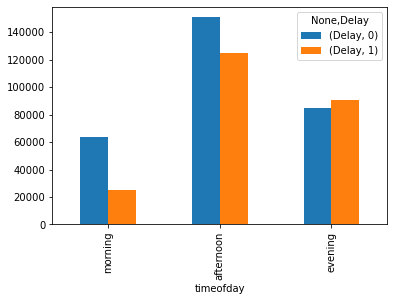

In [24]:
df.groupby(by = ["timeofday","Delay"]).agg({"Delay":"count"}).unstack().plot.bar()

## We can see that it is <span style="color:red"> less delay in the morning </span> and more delays occur later in the day 

In [25]:
a = df[df.Time <720]["Delay"].sample(100,random_state=1)
b = df[df.Time >720]["Delay"].sample(100,random_state=1)

In [26]:
from scipy import stats
t,p = stats.ttest_ind(a,b)
print("t = " + str(t))
print("p = " + str(p))

t = -3.6663769890642195
p = 0.00031600666081269284


<span style="color:blue"> There is a significantly difference in delay rate between early and later in the day. </span>

In [27]:
df.Length.describe()

count    539383.000000
mean        132.202007
std          70.117016
min           0.000000
25%          81.000000
50%         115.000000
75%         162.000000
max         655.000000
Name: Length, dtype: float64

In [28]:
c = df[df.Length <115]["Delay"].sample(100,random_state=1)
d = df[df.Length >115]["Delay"].sample(100,random_state=1)

In [29]:
t2,p2 = stats.ttest_ind(c,d)
print("t = " + str(t2))
print("p = " + str(p2))

t = -1.4167918937066917
p = 0.1581152309552422


## There is <span style="color:red">  no difference in delay rate </span> between long & short flights 

<h1 style="color:green">CLASSIFICATION</h1>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from colorama import Fore
from colorama import Style
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
%matplotlib inline
df.head(1)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,more_delay_airline,more_delay_airportfrom,more_delay_airportto,most_delay_airportto,most_delay_airportfrom,timeofday
0,1,CO,269,SFO,IAH,3,15,205,1,1,1,0,0,1,morning


In [31]:
#Define tested features and target variable
tested_feature_list = ["more_delay_airline","Time"]
scaler = StandardScaler()
# transform data
X = df.loc[:,tested_feature_list]
y = df.Delay

In [32]:
#Spliting datasest
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 1)

In [33]:
  # Plot the ROC Curve
def plot_model(X_test, y_test, MODELs):
    fpr, tpr, _ = metrics.roc_curve(y_test, MODELs)    

    # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    roc_auc = metrics.auc(fpr, tpr)
    
    # Calculate AUC of model
    AUC = metrics.roc_auc_score(y_test, MODELs)
    print(f"{Fore.GREEN}The area under the curve is{Style.RESET_ALL}", AUC)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for current model')
    plt.legend(loc = "lower right")
    plt.show()

In [34]:
 # Plot heatmap
def score_heatmap(X_test, y_pred):
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy:', ac)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt='d');
    print(classification_report(y_test,y_pred))

In [71]:
# Calculate accuracy, precision, recall, f1-score, and kappa score
def evaluate_model(y_test, y_pred):
     acc = metrics.accuracy_score(y_test, y_pred)
     prec = metrics.precision_score(y_test, y_pred)
     rec = metrics.recall_score(y_test, y_pred)
     f1 = metrics.f1_score(y_test, y_pred)
     kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
     print("Accuracy: ", acc)
     print("Precision: ", prec)
     print("Recall:", rec)
     print("f1 Score:", f1)
     print("Cohens Kappa Score:", kappa)
     return acc,prec

# Logistic Regression

In [36]:
logreg = LogisticRegression()
logreg_model = make_pipeline(scaler,logreg)

In [37]:
logreg_model.fit(X_train,y_train)
# Scores in Train vs Test Dataset
print("Model score in Train Dataset is ", logreg_model.score(X_train,y_train))
print("Model score in Test Dataset is ", logreg_model.score(X_test,y_test))

Model score in Train Dataset is  0.6284454909085853
Model score in Test Dataset is  0.6274831521084198


In [38]:
# Confussion Matrics
y_pred_class = logreg_model.predict(X_test)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print(metrics.confusion_matrix(y_test, y_pred_class))

[['TN' 'FP']
 ['FN' 'TP']]
[[45752 14007]
 [26179 21939]]


In [39]:
evaluate_model(y_test, y_pred_class)

Accuracy:  0.6274831521084198
Precision:  0.6103321649140377
Recall: 0.4559416434598279
f1 Score: 0.5219594594594594
Cohens Kappa Score: 0.22714668711520658


The area under the curve is 0.6480746778130947


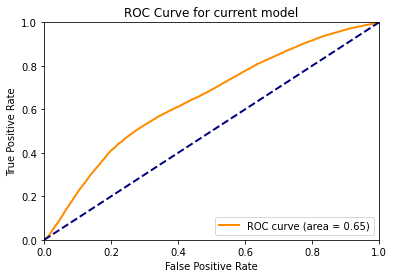

In [40]:
preds_log = logreg_model.predict_proba(X_test)[:,1]
# Generate the prediction values for each of the test observations using predict_proba() 
# function rather than just predict

plot_model(X_test, y_test, preds_log)

In [41]:
target_col = 'Delay'
feature_cols = tested_feature_list
logreg = LogisticRegression()
scores_log = cross_val_score(logreg, df[feature_cols], df[target_col], cv=5)
Score_log_mean = scores_log.mean()
print (Score_log_mean)

0.628004622701361


Accuracy: 0.6274831521084198
              precision    recall  f1-score   support

           0       0.64      0.77      0.69     59759
           1       0.61      0.46      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.62      0.61      0.61    107877
weighted avg       0.62      0.63      0.62    107877



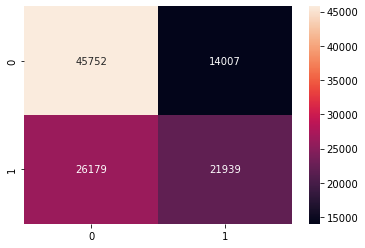

In [42]:
score_heatmap(X_test, y_pred_class)

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
Nb = GaussianNB()
Nb_model = make_pipeline(scaler,Nb)
Nb_model.fit(X_train, y_train)
# Scores in Train vs Test Dataset
print("Model score in Train Dataset is ", Nb_model.score(X_train,y_train))
print("Model score in Test Dataset is ", Nb_model.score(X_test,y_test))

Model score in Train Dataset is  0.6305242569048866
Model score in Test Dataset is  0.6306719690017335


In [45]:
y_pred_Nb = Nb_model.predict(X_test)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print(metrics.confusion_matrix(y_test, y_pred_Nb))

[['TN' 'FP']
 ['FN' 'TP']]
[[45579 14180]
 [25662 22456]]


In [46]:
evaluate_model(y_test, y_pred_Nb)

Accuracy:  0.6306719690017335
Precision:  0.6129490119008626
Recall: 0.46668606342740765
f1 Score: 0.5299100927389859
Cohens Kappa Score: 0.23485811967713777


The area under the curve is 0.6492491856574905


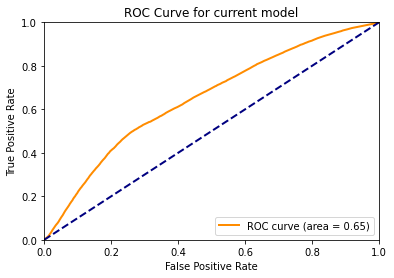

In [47]:
preds_Nb = Nb_model.predict_proba(X_test)[:,1]
plot_model(X_test, y_test, preds_Nb)

In [48]:
scores_nb = cross_val_score(Nb_model, df[feature_cols], df[target_col], cv=5)
Score_nb_mean = scores_nb.mean()
print (Score_nb_mean)

0.6303499012060941


Accuracy: 0.6306719690017335
              precision    recall  f1-score   support

           0       0.64      0.76      0.70     59759
           1       0.61      0.47      0.53     48118

    accuracy                           0.63    107877
   macro avg       0.63      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877



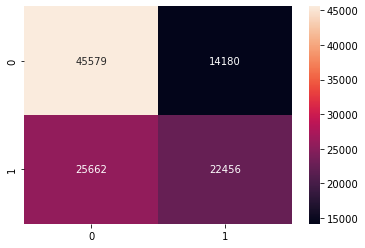

In [49]:
score_heatmap(X_test, y_pred_Nb)

## <span style="color:red"> True Positive is higher than the logistic classification </span>

# Decision Tree

In [50]:
DT_model=tree.DecisionTreeClassifier(random_state=0)
DT_model.fit(X_train,y_train)
# Scores in Train vs Test Dataset
print("Model score in Train Dataset is ", DT_model.score(X_train,y_train))
print("Model score in Test Dataset is ", DT_model.score(X_test,y_test))

Model score in Train Dataset is  0.6390038608964881
Model score in Test Dataset is  0.6340925313088054


In [51]:
y_pred_DT = DT_model.predict(X_test)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print(metrics.confusion_matrix(y_test, y_pred_DT))

[['TN' 'FP']
 ['FN' 'TP']]
[[46795 12964]
 [26509 21609]]


In [52]:
evaluate_model(y_test, y_pred_DT)

Accuracy:  0.6340925313088054
Precision:  0.6250253087669568
Recall: 0.44908350305498984
f1 Score: 0.5226445441462796
Cohens Kappa Score: 0.23868975339208864


The area under the curve is 0.6642808711350929


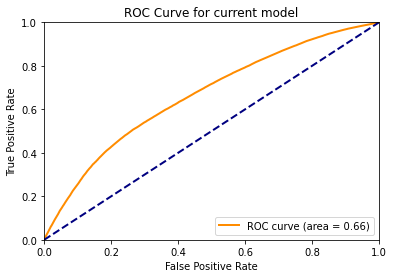

In [53]:
preds_DT = DT_model.predict_proba(X_test)[:,1]
plot_model(X_test, y_test, preds_DT)


In [54]:
scores_DT = cross_val_score(DT_model, df[feature_cols], df[target_col], cv=5)
Score_DT_mean = scores_DT.mean()
print (Score_DT_mean)

0.6331660742410399


Accuracy: 0.6340925313088054
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     59759
           1       0.63      0.45      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.63      0.62      0.61    107877
weighted avg       0.63      0.63      0.62    107877



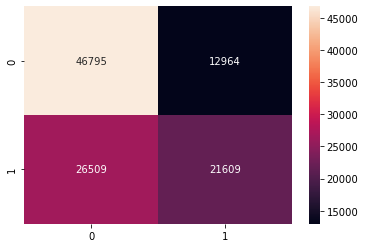

In [55]:
score_heatmap(X_test, y_pred_DT)

# Support Vector Machine

In [56]:
SVC_model=LinearSVC()
SVC_model = CalibratedClassifierCV(SVC_model) 
SVC_model = make_pipeline(scaler,SVC_model)
SVC_model.fit(X_train,y_train)
# Scores in Train vs Test Dataset
print("Model score in Train Dataset is ", SVC_model.score(X_train,y_train))
print("Model score in Test Dataset is ", SVC_model.score(X_test,y_test))

Model score in Train Dataset is  0.6288626345867728
Model score in Test Dataset is  0.6284286733965535


In [57]:
SVC_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('calibratedclassifiercv',
                 CalibratedClassifierCV(base_estimator=LinearSVC()))])

In [58]:
y_pred_SVC = SVC_model.predict(X_test)
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print(metrics.confusion_matrix(y_test, y_pred_SVC))

[['TN' 'FP']
 ['FN' 'TP']]
[[45770 13989]
 [26095 22023]]


In [59]:
evaluate_model(y_test, y_pred_SVC)

Accuracy:  0.6284286733965535
Precision:  0.6115461512829057
Recall: 0.457687351926514
f1 Score: 0.5235468917152027
Cohens Kappa Score: 0.22921391647581946


Accuracy: 0.6284286733965535
              precision    recall  f1-score   support

           0       0.64      0.77      0.70     59759
           1       0.61      0.46      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.62      0.61      0.61    107877
weighted avg       0.63      0.63      0.62    107877



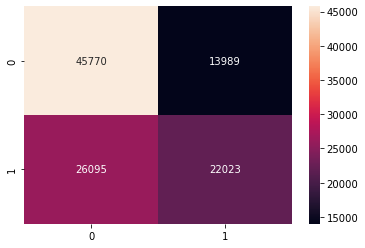

In [60]:
score_heatmap(X_test, y_pred_SVC)

The area under the curve is 0.6480036998382257


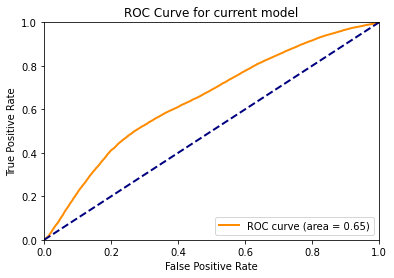

In [61]:
preds_SVC = SVC_model.predict_proba(X_test)[:,1]
plot_model(X_test, y_test, preds_SVC)

# Models Comparison

In [62]:
print("Confusion matrix")
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))
print("Logistic Regression")
print(metrics.confusion_matrix(y_test, y_pred_class))
print("Naive Bayes")
print(metrics.confusion_matrix(y_test, y_pred_Nb))
print("Decision Tree")
print(metrics.confusion_matrix(y_test, y_pred_DT))
print("Support Vector Machine")
print(metrics.confusion_matrix(y_test, y_pred_SVC))

Confusion matrix
[['TN' 'FP']
 ['FN' 'TP']]
Logistic Regression
[[45752 14007]
 [26179 21939]]
Naive Bayes
[[45579 14180]
 [25662 22456]]
Decision Tree
[[46795 12964]
 [26509 21609]]
Support Vector Machine
[[45770 13989]
 [26095 22023]]


In [72]:
print("Accuracy, Precision, Recall, f1-score, and kappa score\n")
print("Logistic Regression")
acc_lg,prec_lg = evaluate_model(y_test, y_pred_class)
print("\nNaive Bayes")
acc_nb,prec_nb = evaluate_model(y_test, y_pred_Nb)
print("\nDecision Tree")
acc_dt,prec_dt = evaluate_model(y_test, y_pred_DT)
print("\nSupport Vector Machine")
acc_svm,prec_svm = evaluate_model(y_test, y_pred_SVC)


Accuracy, Precision, Recall, f1-score, and kappa score

Logistic Regression
Accuracy:  0.6274831521084198
Precision:  0.6103321649140377
Recall: 0.4559416434598279
f1 Score: 0.5219594594594594
Cohens Kappa Score: 0.22714668711520658

Naive Bayes
Accuracy:  0.6306719690017335
Precision:  0.6129490119008626
Recall: 0.46668606342740765
f1 Score: 0.5299100927389859
Cohens Kappa Score: 0.23485811967713777

Decision Tree
Accuracy:  0.6340925313088054
Precision:  0.6250253087669568
Recall: 0.44908350305498984
f1 Score: 0.5226445441462796
Cohens Kappa Score: 0.23868975339208864

Support Vector Machine
Accuracy:  0.6284286733965535
Precision:  0.6115461512829057
Recall: 0.457687351926514
f1 Score: 0.5235468917152027
Cohens Kappa Score: 0.22921391647581946


In [89]:
fpr_log, tpr_log, _ = metrics.roc_curve(y_test, preds_log)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, preds_Nb)
fpr_DT, tpr_DT, threshold_DT = metrics.roc_curve(y_test, preds_DT)
fpr_SVC, tpr_SVC, _ = metrics.roc_curve(y_test, preds_SVC)

AUC_log = metrics.roc_auc_score(y_test, preds_log)
AUC_nb = metrics.roc_auc_score(y_test, preds_Nb)
AUC_DT = metrics.roc_auc_score(y_test, preds_DT)
AUC_SVC = metrics.roc_auc_score(y_test, preds_SVC)

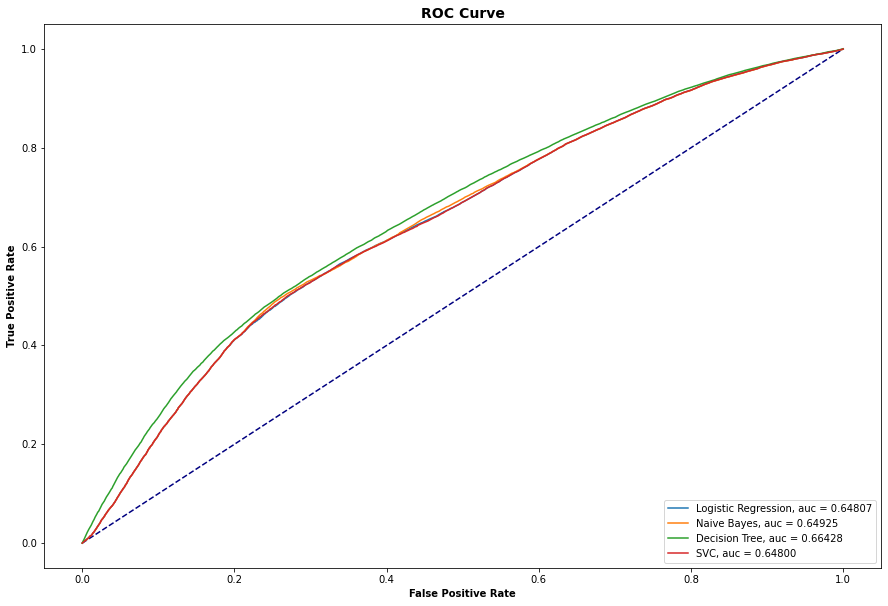

In [90]:
## Comparing ROC Curve
plt.figure(figsize=(15,10))
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression, auc = {:0.5f}'.format(AUC_log))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes, auc = {:0.5f}'.format(AUC_nb))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree, auc = {:0.5f}'.format(AUC_DT))
plt.plot(fpr_SVC, tpr_SVC, label='SVC, auc = {:0.5f}'.format(AUC_SVC))


## Configure x and y axis
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend(loc=4)

plt.show()

In [77]:
model_comparision_df = pd.DataFrame({"Accuracy":[acc_lg,acc_nb,acc_dt,acc_svm],
                                     "Precision":[prec_lg,prec_nb,prec_dt,prec_svm],
                                    "Index":["Logistic Regression","Naive Bayes","Decision Tree",
                                             "Support Vector Machine"]},columns = ["Index","Accuracy","Precision"])
model_comparision_df.sort_values(by="Precision",ascending = False)

,Index,Accuracy,Precision
2,Decision Tree,0.634093,0.625025
1,Naive Bayes,0.630672,0.612949
3,Support Vector Machine,0.628429,0.611546
0,Logistic Regression,0.627483,0.610332


<h1 style="color:red"> Model Selection: Accuracy, Precision and Time to train</h1>
<h2 style="color:green">Precision: If the model predicts Positive, how often it is correct?</h2>
<h3>Reasons: We want reduce the delay rate with minimum resources. We can tolerate the model predicting not delay wrong, but we don't want to waste resource on "Fault Delay".</h3>
<h3>Decision Tree: We selected Decision tree since it has the best precision rate</h3>

Accuracy: 0.6340925313088054
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     59759
           1       0.63      0.45      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.63      0.62      0.61    107877
weighted avg       0.63      0.63      0.62    107877



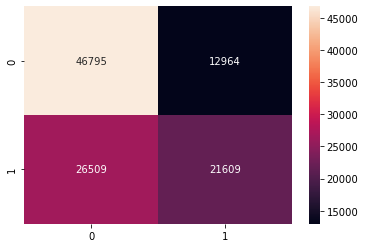

In [78]:
score_heatmap(X_test, y_pred_DT)

<h3>Delay rate at the airport is 45%. If we take a wild guess without using this model: it will take has the chance of predicting delay correctly is 45%. This model can help to increase the chance to 63%</h3>

# Stakeholder is the gornverment. With the budget of ten mil, they can only support ten thousands flights, as supporting cost is one thousand dollar per flight. 

In [66]:
# number of positive cases depend on thredhold

In [187]:
small_thres = threshold_DT[(threshold_DT>0.5)&(threshold_DT<1)]

In [188]:
total_positive_preds_list = []
fpr_list = []
c = dict(zip(threshold_DT,fpr_DT))
for i in small_thres[small_thres<1]:
    total_positive_preds = (preds_DT >i).sum()
    fpr_i = c[i]
    fpr_list.append(fpr_i)
    total_positive_preds_list.append(total_positive_preds)

Text(0, 0.5, 'FPR')

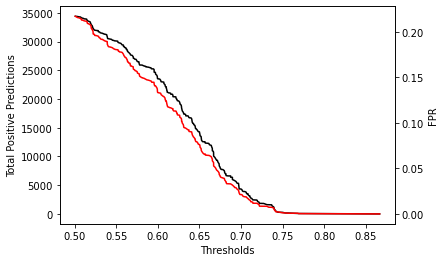

In [202]:

left_data = total_positive_preds_list
right_data = fpr_list

fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()
ax_left.plot(small_thres,left_data, color='black')
ax_right.plot(small_thres,right_data, color='red')
ax_left.set_xlabel("Thresholds")
ax_left.set_ylabel("Total Positive Predictions")
ax_right.set_ylabel("FPR")

In [181]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)

clf = [CustomThreshold(DT_model, threshold) for threshold in [0.5, 0.65]]

for model,threshold in zip(clf,[0.5, 0.65]):
    print("At threshold: ",threshold)
    print(classification_report(y_test, model.predict(X_test)))
    print('\n')

At threshold:  0.5
              precision    recall  f1-score   support

           0       0.64      0.78      0.70     59759
           1       0.63      0.45      0.52     48118

    accuracy                           0.63    107877
   macro avg       0.63      0.62      0.61    107877
weighted avg       0.63      0.63      0.62    107877



At threshold:  0.65
              precision    recall  f1-score   support

           0       0.59      0.92      0.72     59759
           1       0.68      0.20      0.31     48118

    accuracy                           0.60    107877
   macro avg       0.64      0.56      0.52    107877
weighted avg       0.63      0.60      0.54    107877





In [186]:
import locale
locale.setlocale( locale.LC_ALL, '' )

amt = 0.05*10000000

print("Saved: ",locale.currency(amt, grouping=True))


Saved:  $500,000.00
